In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib

from lenstronomy.ImSim.image_linear_solve import ImageLinearFit
import lenstronomy.ImSim.de_lens as de_lens
import dynesty
from dynesty import utils as dyfunc
from dynesty import plotting as dyplot
# Import PySwarms
import pyswarms as ps
import copy
import pickle

from astropy.cosmology import Planck15 as cosmo

nmax = 14

cnk = 1

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
dresults = load_obj(f'POINT_MASS_NFW_FIT_POSA_with_10_8_PERTURBED_FIXmur=1_3_images_SHAPE_SHAPEnmax{nmax}')


def bestfit(result):
    #takes in the result, returns best fit and errors
    #and returns -logl
    logs = result.logl
    samps = result.samples
    argmax = np.argmax(logs)
    
    weights = np.exp(result.logwt - result.logz[-1])
    mean, cov = dyfunc.mean_and_cov(samps, weights)
    
    errs = [cov[i,i] for i in range(len(mean))]
    
    return logs[argmax],samps[argmax],np.sqrt(errs)*2. 


maxl, bestf, cv = bestfit(dresults)

Best fit values:
$\theta_E$ [''] :	 7.55e+05
$\gamma$ :	 3.0
$x_p$ [''] :	 0.613
$y_p$ [''] :	 -0.011


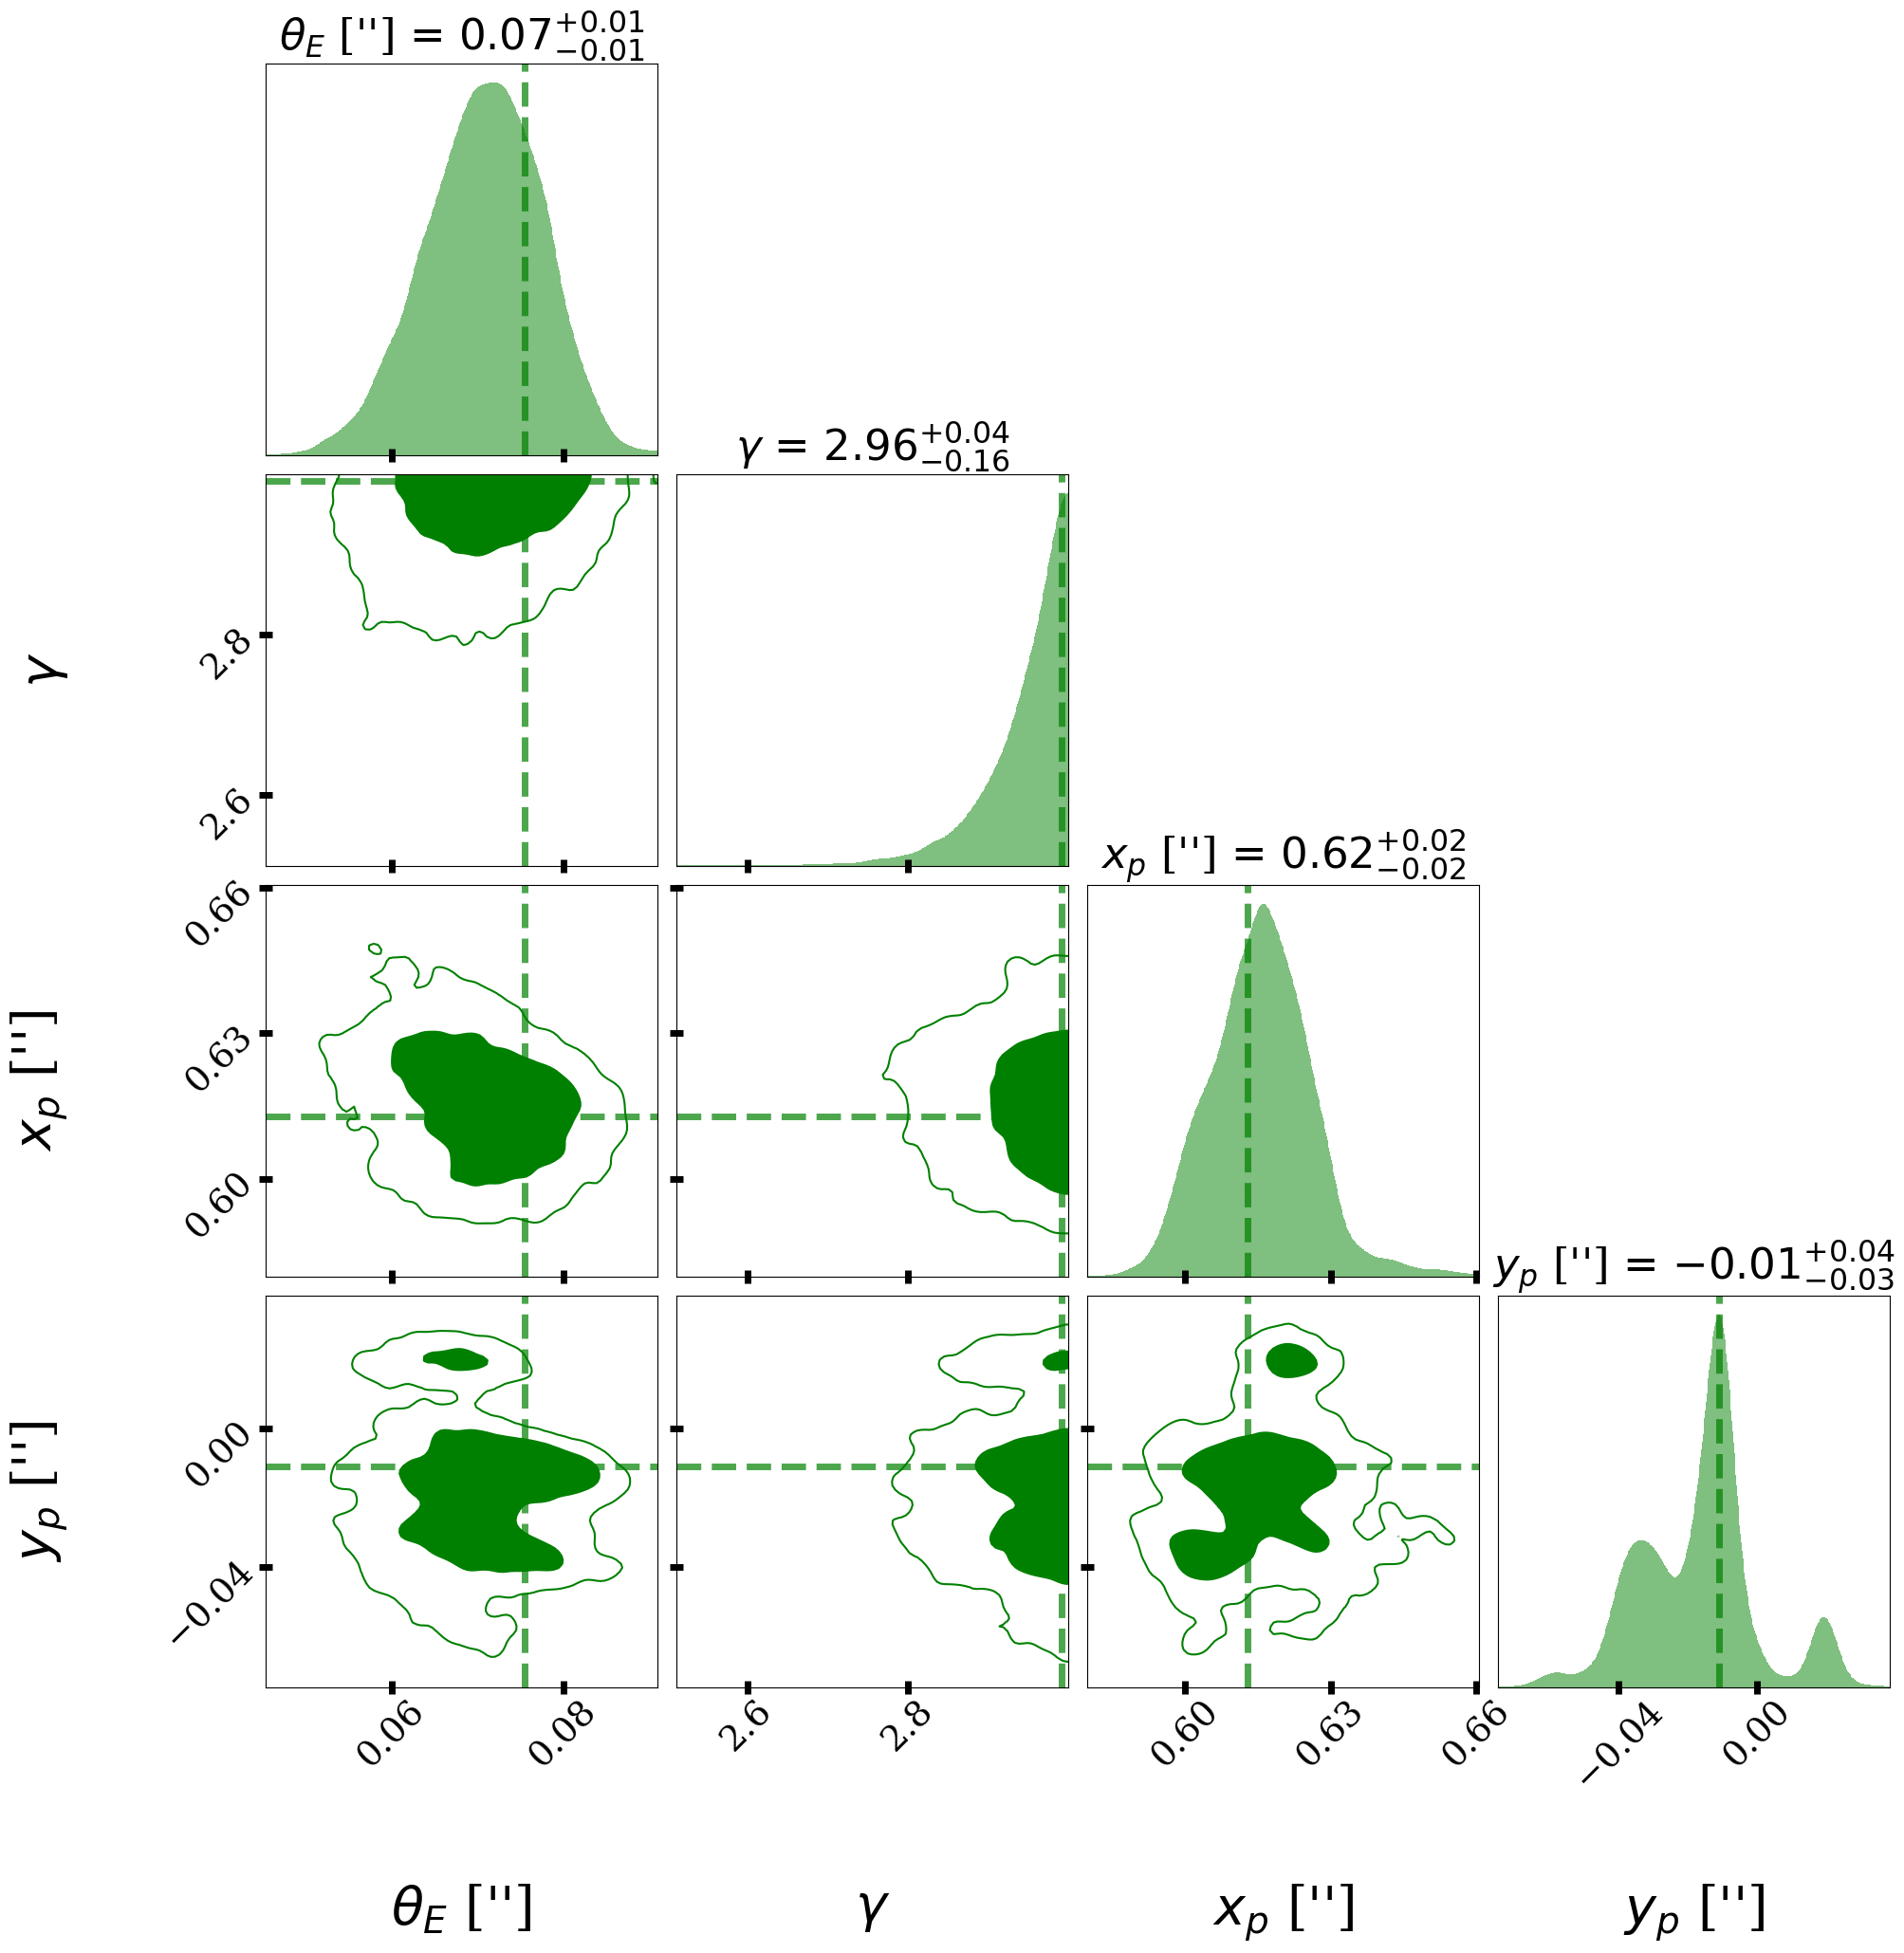

In [3]:
labls_mask = ["$\\theta_E$ ['']", '$\\gamma$', "$x_p$ ['']", "$y_p$ ['']"]
lbls = ["$\\theta_E$ ['']", '$\\gamma$', "$x_p$ ['']", "$y_p$ ['']"]
sigfigs = [3, 3, 2, 2]

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 27}
matplotlib.rc('font', **font)

truedic = {'linewidth':5.,'linestyle':'dashed'}
histdic = {'density':True,'alpha':0.5}

N = 4

#nlist = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

nlist = [18, 19, 20, 21]

labels_plot = []
bestfpp = np.zeros(N)
print("Best fit values:")
for i in range(N):
    labels_plot.append(labls_mask[i])
    bestfpp[i] = bestf[nlist[i]]
    if i == 0:
        print(lbls[i], ":\t", f"{bestf[nlist[i]]*1e7:.3}")
    elif i == 1:
        print(lbls[i], ":\t", round(bestf[nlist[i]], 1))
    else:
        print(lbls[i], ":\t", round(bestf[nlist[i]], 3))

tfig2,taxes2 = plt.subplots(N,N,figsize=(5*N,5*N))

span = np.ones(N)*0.9995 #[[0.5,5.0],[0.,120.],[-0.00,0.10],[0.455,0.49],[0.75,1.75]]

quant = [0.6826894921370859,0.9544997361036416]

intcplot,intcbestplot = dresults, bestfpp

tfig2, _ = dyplot.cornerplot(intcplot,span=span,dims=nlist,quantiles=[],quantiles_2d=quant,show_titles=True,
                                  truths=intcbestplot,truth_color='green',labels=labls_mask,color='green',fig=[tfig2, taxes2],
                                  hist_kwargs=histdic,truth_kwargs=truedic)

for i in range(N):
    for j in range(N):
        taxes2[i,j].tick_params(which='major', length=10, width=5., direction='inout',pad=0.)
        if i == N-1:
            taxes2[i,j].set_xlabel(labls_mask[j], fontsize = 40)
            taxes2[i,j].xaxis.set_label_coords(0.5,-0.5)
            
        if j == 0:
            if i > 0:
                taxes2[i,j].set_ylabel(labls_mask[i], fontsize = 40)
                taxes2[i,j].yaxis.set_label_coords(-0.5,0.5)
        
        if j==i:
            taxes2[i,j].xaxis.set_major_locator(plt.MaxNLocator(3))
        if j<i:
            taxes2[i,j].xaxis.set_major_locator(plt.MaxNLocator(3))
            taxes2[i,j].yaxis.set_major_locator(plt.MaxNLocator(3))

plt.savefig("perturber_posteriors_abell-s1063.png")

In [4]:
labls_mask = ['$\\lambda_{\mathrm{tan},1}$','$s_{\mathrm{tan},1}$ [arcsec$^{-1}$]','$\\phi_{1}/\pi$ ',
              '$\\lambda_{\mathrm{rad},2}$','$\\lambda_{\mathrm{tan},2}$','$s_{\mathrm{tan},2}$ [arcsec$^{-1}$]','$\\phi_{2}/\pi$','$\\alpha_{2,x}$ [arcsec]', '$\\alpha_{2,y}$ [arcsec]',
              '$\\lambda_{\mathrm{rad},3}$','$\\lambda_{\mathrm{tan},3}$','$s_{\mathrm{tan},3}$ [arcsec$^{-1}$]','$\\phi_{3}/\pi$','$\\alpha_{3,x}$ [arcsec]', '$\\alpha_{3,y}$ [arcsec]', 
              '$\\delta_1$ [arcsec]', '$x_1$ [arcsec]', '$y_1$ [arcsec]',
              "$\\theta_E$ ['']", '$\\gamma$', "$x_p$ ['']", "$y_p$ ['']"]

truedic = {'linewidth':5.,'linestyle':'dashed'}
histdic = {'density':True,'alpha':0.5}

N = 22

nlist = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
print(len(nlist))
labels_plot = []
bestfpp = np.zeros(N)
for i in range(len(nlist)):
    labels_plot.append(labls_mask[nlist[i]])
    bestfpp[i] = bestf[nlist[i]]


tfig2,taxes2 = plt.subplots(N,N,figsize=(5*N,5*N))

span = np.ones(N)*0.9995#[[0.5,5.0],[0.,120.],[-0.00,0.10],[0.455,0.49],[0.75,1.75]]

quant = [0.6826894921370859,0.9544997361036416]

intcplot,intcbestplot = dresults, bestfpp

tfig2, _ = dyplot.cornerplot(intcplot,span=span,dims=nlist,quantiles=[],quantiles_2d=quant,show_titles=True,
                                  truths=intcbestplot,truth_color='green',labels=labls_mask,color='green',fig=[tfig2, taxes2],
                                  hist_kwargs=histdic,truth_kwargs=truedic)

for i in range(N):
    for j in range(N):
        taxes2[i,j].tick_params(which='major', length=10, width=5., direction='inout',pad=0.)
        if i == N-1:
            taxes2[i,j].set_xlabel(labels_plot[j])
            taxes2[i,j].xaxis.set_label_coords(0.5,-0.5)
            
        if j == 0:
            if i > 0:
                taxes2[i,j].set_ylabel(labels_plot[i])
                taxes2[i,j].yaxis.set_label_coords(-0.5,0.5)
        
#        taxes2[i,j].set_ylabel(taxes2[i,j].get_ylabel(),labelpad=100.)
        if j==i:
            taxes2[i,j].xaxis.set_major_locator(plt.MaxNLocator(3))
        if j<i:
            taxes2[i,j].xaxis.set_major_locator(plt.MaxNLocator(3))
            taxes2[i,j].yaxis.set_major_locator(plt.MaxNLocator(3))

plt.savefig("All_posteriors_abell-s1063.png")

#plt.tight_layout()
plt.show()

22
